In [4]:
# train_and_export_model.py

import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("careermitra_dataset.csv")

# Select only the first 9 numerical percentage columns as input features
input_columns = [
    'Acedamic percentage in Operating Systems',
    'percentage in Algorithms',
    'Percentage in Programming Concepts',
    'Percentage in Software Engineering',
    'Percentage in Computer Networks',
    'Percentage in Electronics Subjects',
    'Percentage in Computer Architecture',
    'Percentage in Mathematics',
    'Percentage in Communication skills'
]

X = data[input_columns]
y = data['Suggested Job Role']

# Scale the numerical inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
# Train MLP model
model = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(250, 250, 250, 250, 250),
    solver='adam',
    max_iter=300,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate accuracy
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)


print(f"✅ Training Accuracy: {train_accuracy:.4f}")
print(f"✅ Testing Accuracy: {test_accuracy:.4f}")

✅ Training Accuracy: 0.9997
✅ Testing Accuracy: 0.6972


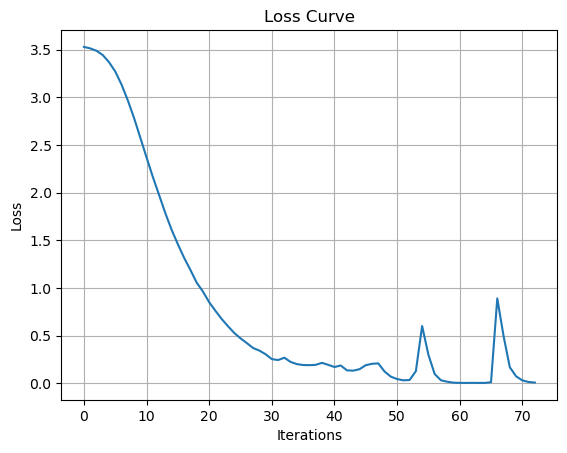

In [14]:
import matplotlib.pyplot as plt

plt.plot(model.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()


In [15]:

# Export the model and encoders
with open("mlp_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("Model and encoders for 9 numerical percentage fields exported successfully.")

Model and encoders for 9 numerical percentage fields exported successfully.
